In [1]:
import numpy as np
print("Numpy version: "+np.__version__)
%matplotlib inline
import matplotlib.pylab as plt
print("Matplotlib version: "+plt.__version__)

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve

Numpy version: 1.13.0
Matplotlib version: 1.13.0


## Data generation

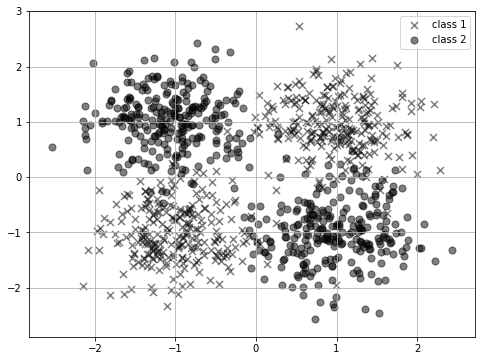

In [2]:
N = 1000  # number of samples
X, Y = make_blobs(n_samples=N, centers=[[1, 1], [-1, 1], [1, -1], [-1, -1]], cluster_std=0.5)
# Make it a two-class problem:
Y[Y==2] = 1.0
Y[Y==3] = 0.0 
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(X[Y==0, 0], X[Y==0, 1], c='k', marker='x', 
           s=50, alpha=0.5, label='class 1')
ax.scatter(X[Y==1, 0], X[Y==1, 1], c='k', marker='o', 
           s=50, alpha=0.5, label='class 2')
plt.legend()
plt.grid()
# Simple train, test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.25, test_size=0.75)
# Create meshgrid for the probability plots
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05), np.arange(y_min, y_max, 0.05))

In [3]:
# Simple train, test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.25, test_size=0.75)
# Create meshgrid for the probability plots
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05), np.arange(y_min, y_max, 0.05))

## Decision Tree

In [ ]:
- 

Classification score:
Train: 0.996000
Test: 0.908000


(0.0, 1.0)

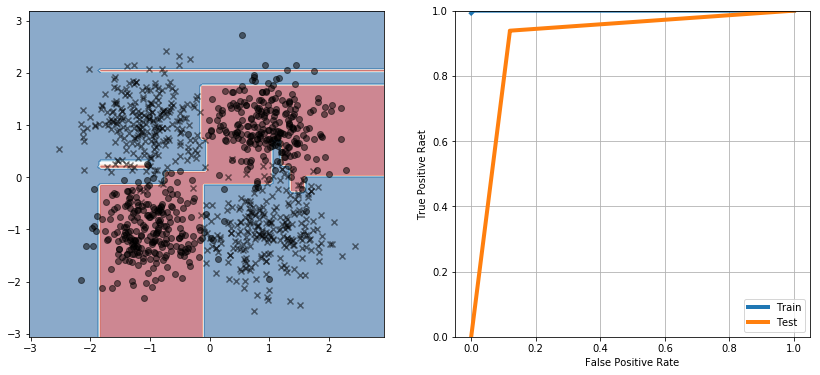

In [11]:
model = DecisionTreeClassifier(criterion='gini', max_features='sqrt', 
                               splitter='best', max_depth=10)
model.fit(X_train, Y_train)

Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
print("Classification score:")
print("Train: %f" % (model.score(X_train, Y_train)))
print("Test: %f" % (model.score(X_test, Y_test)))

fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(1, 2, 1)
ax.contourf(xx, yy, Z.reshape(xx.shape), cmap=plt.cm.RdBu, alpha=0.5)
ax.scatter(X[Y==0, 0], X[Y==0, 1], color='k', marker='o', alpha=0.5)
ax.scatter(X[Y==1, 0], X[Y==1, 1], color='k', marker='x', alpha=0.5)
ax = fig.add_subplot(1, 2, 2)
fpr, tpr, th = roc_curve(Y_train, model.predict_proba(X_train)[:, 1])
ax.plot(fpr, tpr, label='Train', linewidth=4)
fpr, tpr, th = roc_curve(Y_test, model.predict_proba(X_test)[:, 1])
ax.plot(fpr, tpr, label='Test', linewidth=4)
plt.grid()
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Raet')
ax.set_ylim([0.0, 1.0])


## Adaboost

Classification score:
Train: 1.000000
Test: 0.960000


(0.0, 1.05)

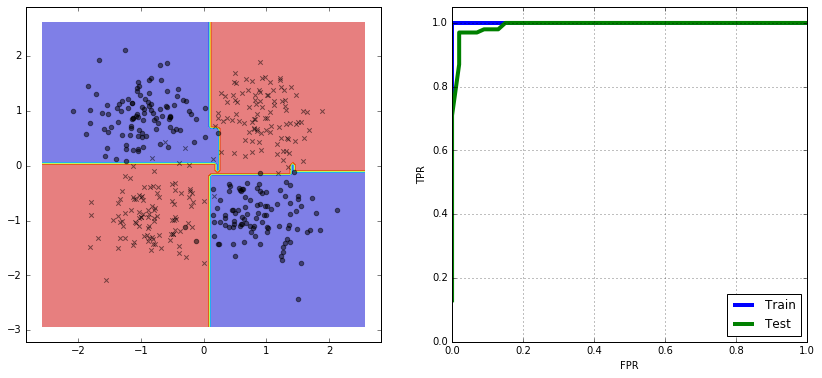

In [42]:
model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                           algorithm='SAMME.R', n_estimators=20, learning_rate=1.0)

model.fit(X[index_train,:], Y[index_train])
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05), np.arange(y_min, y_max, 0.05))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
print("Classification score:")
print("Train: %f" % (model.score(X[index_train, :], Y[index_train])))
print("Test: %f" % (model.score(X[index_test, :], Y[index_test])))

fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(1, 2, 1)
ax.contourf(xx, yy, Z, cmap=plt.cm.jet, alpha=0.5)
ax.scatter(X[Y==0, 0], X[Y==0, 1], color='k', marker='o', alpha=0.5)
ax.scatter(X[Y==1, 0], X[Y==1, 1], color='k', marker='x', alpha=0.5)
ax = fig.add_subplot(1, 2, 2)
fpr, tpr, th = roc_curve(Y[index_train], model.predict_proba(X[index_train,:])[:, 1])
ax.plot(fpr, tpr, label='Train', linewidth=4)
fpr, tpr, th = roc_curve(Y[index_test], model.predict_proba(X[index_test,:])[:, 1])
ax.plot(fpr, tpr, label='Test', linewidth=4)
plt.grid()
plt.legend(loc=4)
plt.xlabel('FPR')
plt.ylabel('TPR')
ax.set_ylim([0.0, 1.05])

## Gradient Boosting

Classification score:
Train: 1.000000
Test: 0.955000


(0.0, 1.05)

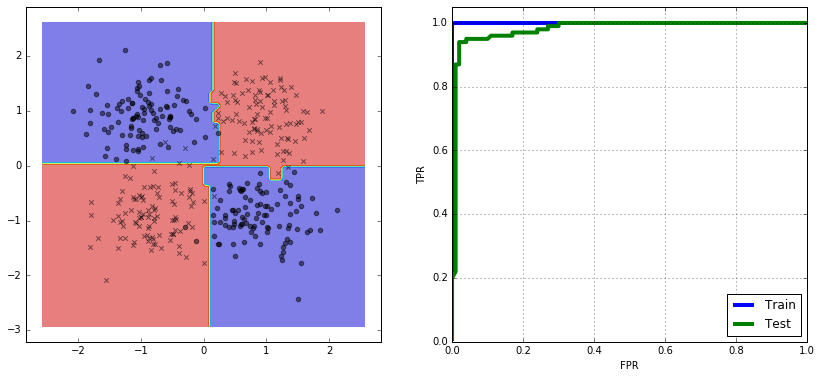

In [8]:
model = GradientBoostingClassifier(loss='deviance', max_depth=3, 
                                   n_estimators=50, max_features='sqrt', learning_rate=0.1)

model.fit(X[index_train,:], Y[index_train])
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05), np.arange(y_min, y_max, 0.05))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
print("Classification score:")
print("Train: %f" % (model.score(X[index_train, :], Y[index_train])))
print("Test: %f" % (model.score(X[index_test, :], Y[index_test])))

fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(1, 2, 1)
ax.contourf(xx, yy, Z, cmap=plt.cm.jet, alpha=0.5)
ax.scatter(X[Y==0, 0], X[Y==0, 1], color='k', marker='o', alpha=0.5)
ax.scatter(X[Y==1, 0], X[Y==1, 1], color='k', marker='x', alpha=0.5)
ax = fig.add_subplot(1, 2, 2)
fpr, tpr, th = roc_curve(Y[index_train], model.predict_proba(X[index_train,:])[:, 1])
ax.plot(fpr, tpr, label='Train', linewidth=4)
fpr, tpr, th = roc_curve(Y[index_test], model.predict_proba(X[index_test,:])[:, 1])
ax.plot(fpr, tpr, label='Test', linewidth=4)
plt.grid()
plt.legend(loc=4)
plt.xlabel('FPR')
plt.ylabel('TPR')
ax.set_ylim([0.0, 1.05])